In [1]:
import sys
sys.path.append("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import matplotlib.animation as animation
import scipy as sc
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Fonctions utiles

In [3]:
dfc = np.load('/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/inputs.npy')
meta = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/metadata.tsv", sep="\t")
n_runs = len(meta)
n_wins = 464
dfc_train_propofol = dfc[meta["monkey"].isin(['almira', 'khali', 'kimiko', 'rana']) & meta["condition"].isin(['deep-propofol','light-propofol'])].reshape((-1, n_wins, 82, 82))
dfc_test_propofol = dfc[(meta["monkey"] == "jade") & meta["condition"].isin(['deep-propofol','light-propofol'])].reshape((-1, n_wins, 82, 82))
dfc_all = dfc.reshape((-1, n_wins, 82, 82))
dfc_train_background = dfc[meta["monkey"].isin(['almira', 'khali', 'kimiko', 'rana'])].reshape((-1, n_wins, 82, 82))
dfc_test_background = dfc[(meta["monkey"] == "jade")].reshape((-1, n_wins, 82, 82))
conditions_train = meta["condition"][meta["monkey"].isin(['almira', 'khali', 'kimiko', 'rana']) & meta["condition"].isin(['deep-propofol','light-propofol'])]
conditions_test = meta["condition"][meta["monkey"].isin(['jade']) & meta["condition"].isin(['deep-propofol','light-propofol'])]
dict_conditions = {"light-propofol":0, "deep-propofol":1}
labels_train = [dict_conditions[elem] for elem in conditions_train]
labels_test = [dict_conditions[elem] for elem in conditions_test]

In [3]:
dfc = np.load('/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.01-0.15-add_compor-False/dfc.npy')
meta = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.01-0.15-add_compor-False/meta.csv")
iu = np.triu_indices(82,k=1)
dfc_flat = dfc[:,:,iu[0],iu[1]]

id_sessions_awake = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "awake"]
id_sessions_light_propofol = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "light-propofol"]
id_sessions_deep_propofol = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "deep-propofol"]
id_sessions_light_sevoflurane = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "sevoflurane2"]
id_sessions_deep_sevoflurane = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "sevoflurane4"]

In [5]:
id_sessions_almira = [i for i in range(len(meta)) if meta["monkey"].iloc[i] == "almira" and meta["condition"].iloc[i] in ["awake","sevoflurane2","sevoflurane4"]]
id_sessions_jade = [i for i in range(len(meta)) if meta["monkey"].iloc[i] == "jade" and meta["condition"].iloc[i] in ["awake","sevoflurane2","sevoflurane4"]]
id_sessions_khali = [i for i in range(len(meta)) if meta["monkey"].iloc[i] == "khali" and meta["condition"].iloc[i] in ["awake","sevoflurane2","sevoflurane4"]]
id_sessions_kimiko = [i for i in range(len(meta)) if meta["monkey"].iloc[i] == "kimiko" and meta["condition"].iloc[i] in ["awake","sevoflurane2","sevoflurane4"]]
id_sessions_rana = [i for i in range(len(meta)) if meta["monkey"].iloc[i] == "rana" and meta["condition"].iloc[i] in ["awake","sevoflurane2","sevoflurane4"]]

## PCA on awake-sevoflurane dataset

In [6]:
id_sessions_sevoflurane = np.concatenate([id_sessions_light_sevoflurane,id_sessions_deep_sevoflurane]).astype(int)
id_sessions_awake_sevoflurane = np.concatenate([id_sessions_awake,id_sessions_light_sevoflurane,id_sessions_deep_sevoflurane]).astype(int)
id_sessions_awake_propofol = np.concatenate([id_sessions_awake,id_sessions_light_propofol,id_sessions_deep_propofol]).astype(int)
X = dfc_flat[id_sessions_awake_sevoflurane,:,:].reshape(-1,3321)
y = np.array(["awake"]*461*len(id_sessions_awake) + ["light-sevoflurane"]*461*len(id_sessions_light_sevoflurane) + ["deep-sevoflurane"]*461*len(id_sessions_deep_sevoflurane))
X_propofol = dfc_flat[id_sessions_awake_propofol,:,:].reshape(-1,3321)
X_sevoflurane = dfc_flat[id_sessions_awake_sevoflurane,:,:].reshape(-1,3321)
X_almira = dfc_flat[id_sessions_almira,:,:].reshape(-1,3321)
X_jade = dfc_flat[id_sessions_jade,:,:].reshape(-1,3321)
X_khali = dfc_flat[id_sessions_khali,:,:].reshape(-1,3321)
X_kimiko = dfc_flat[id_sessions_kimiko,:,:].reshape(-1,3321)
X_rana = dfc_flat[id_sessions_rana,:,:].reshape(-1,3321)

In [9]:
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)
mean = np.mean(X,axis = 0)

v = pca.components_.T
X_sevoflurane_reduced = (X_sevoflurane - mean).dot(v)
X_propofol_reduced = (X_propofol - mean).dot(v)
X_almira_reduced = (X_almira - mean).dot(v)
X_jade_reduced = (X_jade - mean).dot(v)
X_khali_reduced = (X_khali - mean).dot(v)
X_kimiko_reduced = (X_kimiko - mean).dot(v)
X_rana_reduced = (X_rana - mean).dot(v)

/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

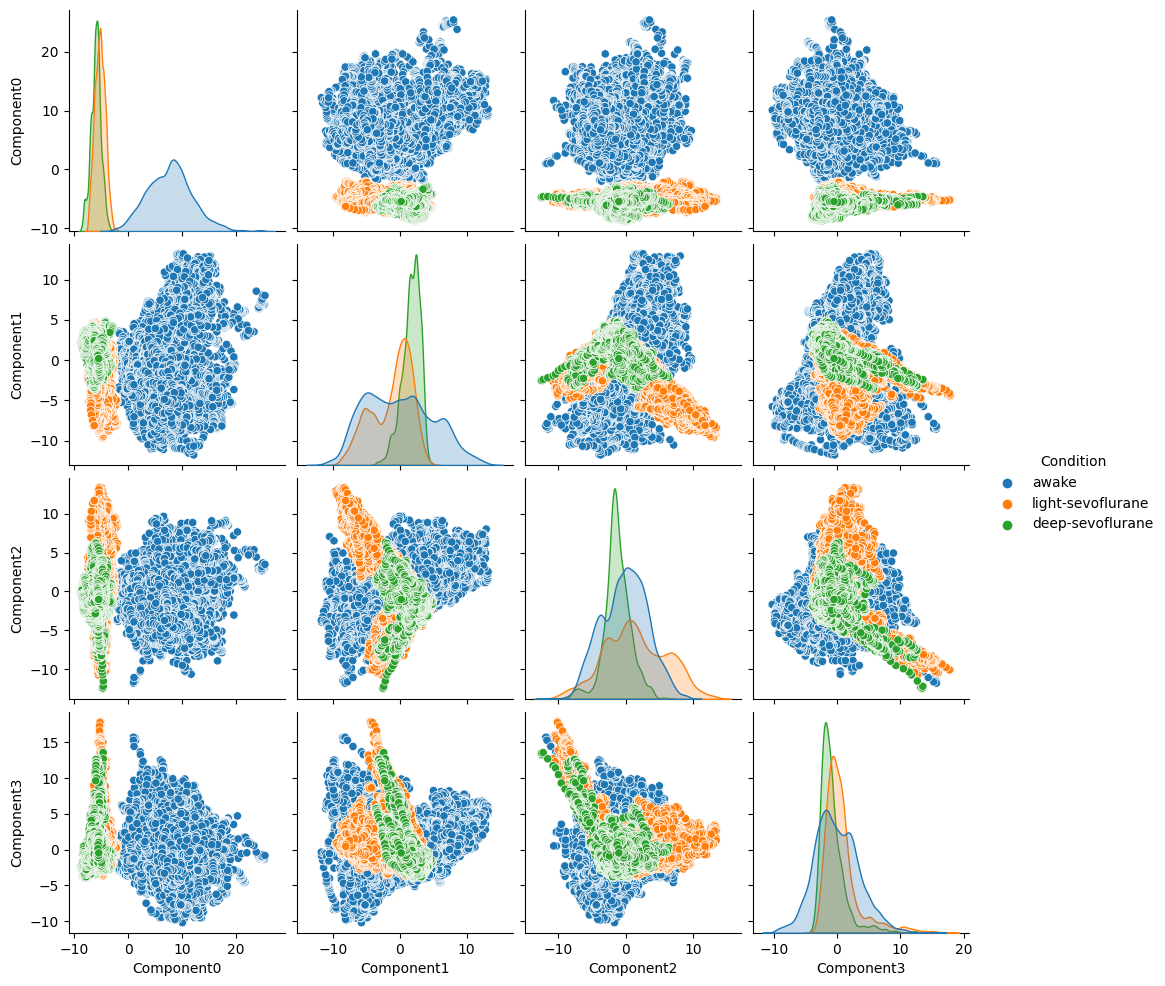

In [10]:
a = len(id_sessions_awake)
b = len(id_sessions_light_sevoflurane)
c = len(id_sessions_deep_sevoflurane)

dico = {}
columns = []
for i in range(4):
    dico["Component{}".format(i+1)] = X_sevoflurane_reduced[:,i].flatten()
    columns.append("Component{}".format(i))
dico["Condition"]= y
columns.append("Condition")
db = pd.DataFrame.from_dict(dico)
db.columns = columns

compteur = 0
bins = np.linspace(-10,10,100)

fig = plt.figure(figsize=(15,10))

sns.pairplot(db,hue = "Condition")

plt.show()

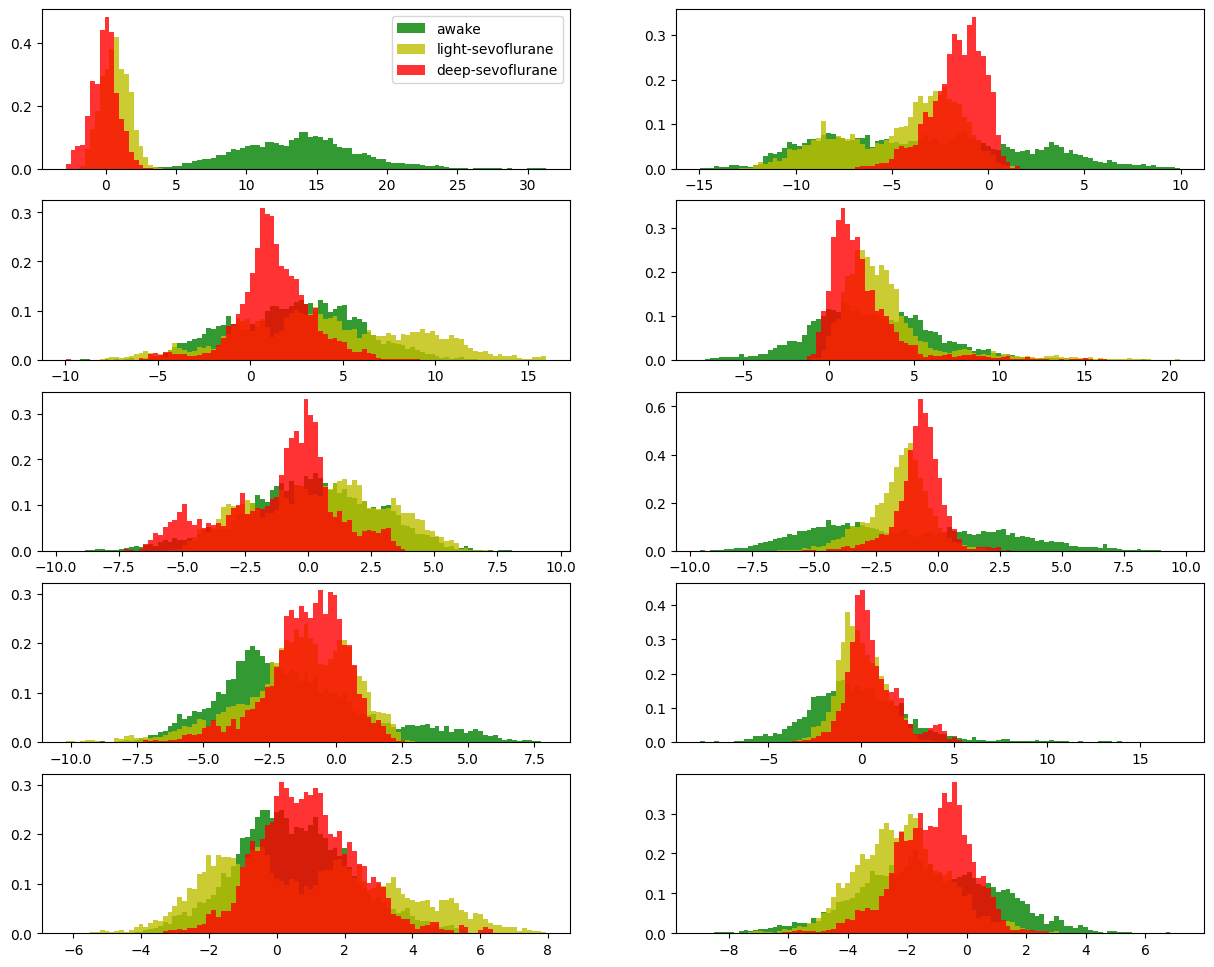

In [7]:
k = len(id_sessions_awake)
n = len(id_sessions_light_sevoflurane)
m = len(id_sessions_deep_sevoflurane)

compteur = 0
bins = np.linspace(-10,10,100)

fig = plt.figure(figsize=(15,12))

for i in range(10):
    v_min = np.min(X_sevoflurane_reduced[:,i])
    v_max = np.max(X_sevoflurane_reduced[:,i])
    bins = np.linspace(v_min,v_max,100)
    counts_awake,_ = np.histogram(X_sevoflurane_reduced[:k*461,i].flatten(),bins)
    counts_light_sevoflurane,_ = np.histogram(X_sevoflurane_reduced[k*461:(n+k)*461,i].flatten(),bins)
    counts_deep_sevoflurane,_ = np.histogram(X_sevoflurane_reduced[(n+k)*461:,i].flatten(),bins)
    fig.add_subplot(5, 2, i+1)
    plt.hist(bins[:-1], bins, weights=counts_awake,density = True,label="awake",color="g",alpha=0.8)
    plt.hist(bins[:-1], bins, weights=counts_light_sevoflurane,density = True,label="light-sevoflurane",color="y",alpha=0.8)
    plt.hist(bins[:-1], bins, weights=counts_deep_sevoflurane,density = True,label="deep-sevoflurane",color="r",alpha=0.8)
    if i == 0:
        plt.legend()
    compteur += 1 
#plt.text(-40, 0.7, '$\\alpha = 2$', fontsize=22, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

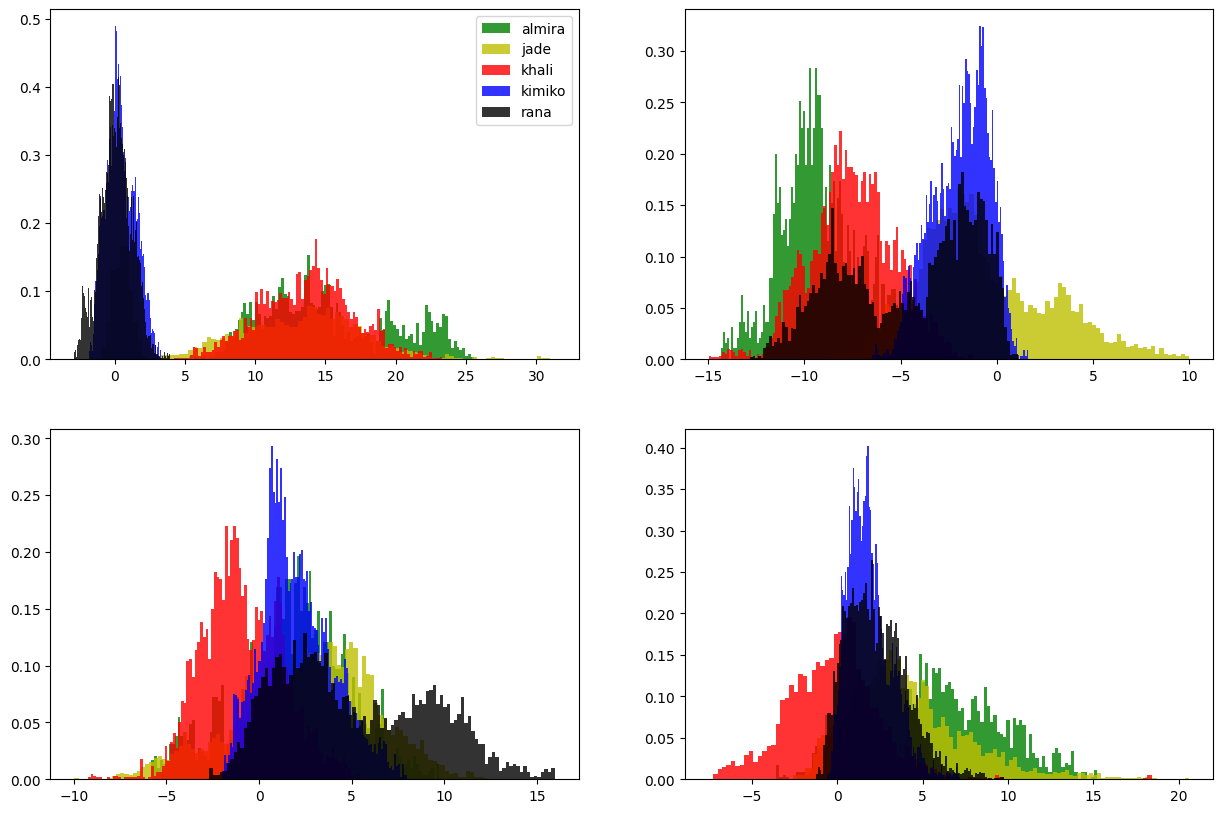

In [8]:
a = len(id_sessions_almira)
b = len(id_sessions_jade)
c = len(id_sessions_khali)
d = len(id_sessions_kimiko)
e = len(id_sessions_rana)

compteur = 0
bins = np.linspace(-10,10,100)

fig = plt.figure(figsize=(15,10))

for i in range(4):
    fig.add_subplot(2,2, i+1)

    v_min = np.min(X_almira_reduced[:,i])
    v_max = np.max(X_almira_reduced[:,i])
    bins = np.linspace(v_min,v_max,100)
    counts_almira,_ = np.histogram(X_almira_reduced[:,i].flatten(),bins)
    plt.hist(bins[:-1], bins, weights=counts_almira,density = True,label="almira",color="g",alpha=0.8)

    v_min = np.min(X_jade_reduced[:,i])
    v_max = np.max(X_jade_reduced[:,i])
    bins = np.linspace(v_min,v_max,100)
    counts_jade,_ = np.histogram(X_jade_reduced[:,i].flatten(),bins)
    plt.hist(bins[:-1], bins, weights=counts_jade,density = True,label="jade",color="y",alpha=0.8)

    v_min = np.min(X_khali_reduced[:,i])
    v_max = np.max(X_khali_reduced[:,i])
    bins = np.linspace(v_min,v_max,100)
    counts_khali,_ = np.histogram(X_khali_reduced[:,i].flatten(),bins)
    plt.hist(bins[:-1], bins, weights=counts_khali,density = True,label="khali",color="r",alpha=0.8)

    v_min = np.min(X_kimiko_reduced[:,i])
    v_max = np.max(X_kimiko_reduced[:,i])
    bins = np.linspace(v_min,v_max,100)
    counts_kimiko,_ = np.histogram(X_kimiko_reduced[:,i].flatten(),bins)
    plt.hist(bins[:-1], bins, weights=counts_kimiko,density = True,label="kimiko",color="b",alpha=0.8)

    v_min = np.min(X_rana_reduced[:,i])
    v_max = np.max(X_rana_reduced[:,i])
    bins = np.linspace(v_min,v_max,100)
    counts_rana,_ = np.histogram(X_rana_reduced[:,i].flatten(),bins)
    plt.hist(bins[:-1], bins, weights=counts_rana,density = True,label="rana",color="k",alpha=0.8)
    
    if i == 0:
        plt.legend()
    compteur += 1 
#plt.text(-40, 0.7, '$\\alpha = 2$', fontsize=22, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

In [43]:
print(meta["condition"][meta["monkey"] == "almira"].unique())
print(meta["condition"][meta["monkey"] == "jade"].unique())
print(meta["condition"][meta["monkey"] == "khali"].unique())
print(meta["condition"][meta["monkey"] == "kimiko"].unique())
print(meta["condition"][meta["monkey"] == "rana"].unique())

['awake']
['awake' 'light-propofol' 'deep-propofol' 'sevoflurane2' 'sevoflurane4']
['awake' 'ketamine' 'light-propofol' 'deep-propofol']
['ketamine' 'sevoflurane2' 'sevoflurane4']
['ketamine' 'light-propofol' 'deep-propofol' 'sevoflurane2' 'sevoflurane4']


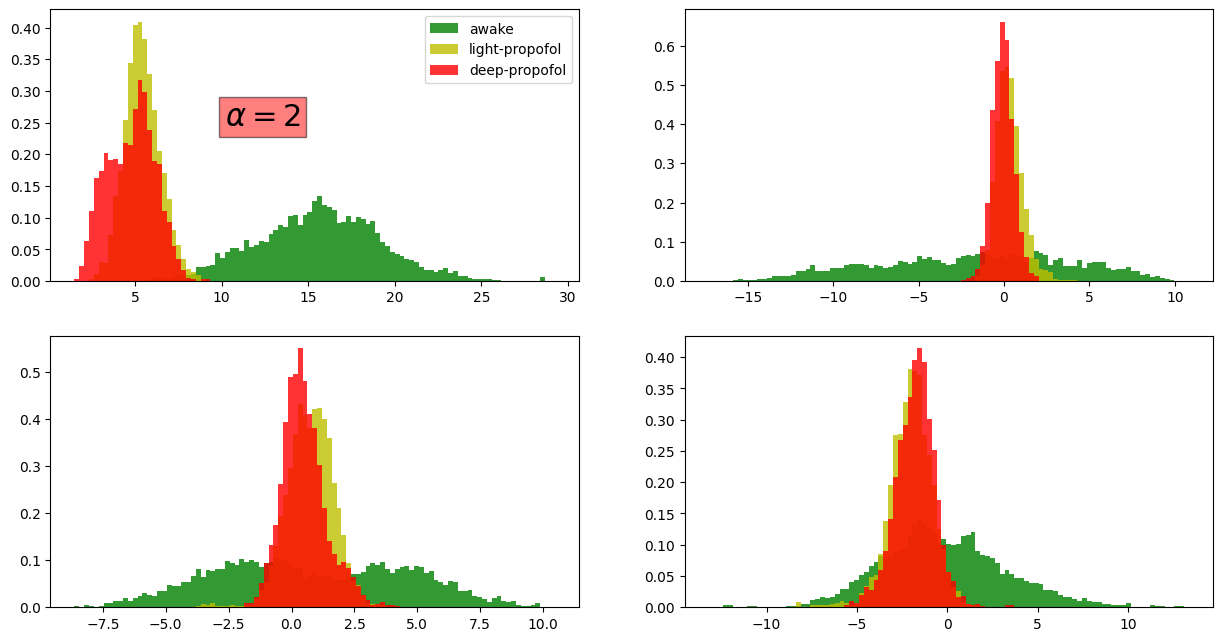

In [57]:
compteur = 0
bins = np.linspace(-10,10,100)

k = len(id_sessions_awake)
n = len(id_sessions_light_propofol)
m = len(id_sessions_deep_propofol)

fig = plt.figure(figsize=(15,12))

for i in range(4):
    v_min = np.min(dfc_propofol_reduced[:,i])
    v_max = np.max(dfc_propofol_reduced[:,i])
    bins = np.linspace(v_min,v_max,100)
    counts_awake,_ = np.histogram(dfc_propofol_reduced[:k*461,i].flatten(),bins)
    counts_light_propofol,_ = np.histogram(dfc_propofol_reduced[k*461:(n+k)*461,i].flatten(),bins)
    counts_deep_propofol,_ = np.histogram(dfc_propofol_reduced[(n+k)*461:,i].flatten(),bins)
    fig.add_subplot(3, 2, i+1)
    plt.hist(bins[:-1], bins, weights=counts_awake,density = True,label="awake",color="g",alpha=0.8)
    plt.hist(bins[:-1], bins, weights=counts_light_propofol,density = True,label="light-propofol",color="y",alpha=0.8)
    plt.hist(bins[:-1], bins, weights=counts_deep_propofol,density = True,label="deep-propofol",color="r",alpha=0.8)
    if i == 0:
        plt.legend()
    compteur += 1 
plt.text(-40, 0.77, '$\\alpha = 2$', fontsize=22, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

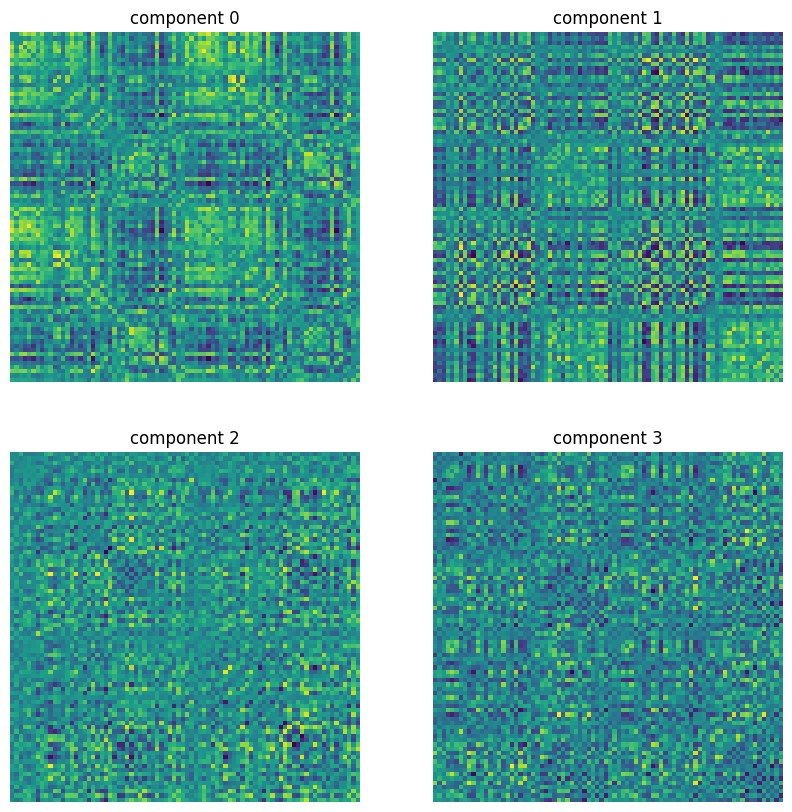

In [14]:
fig = plt.figure(figsize=(10,10))

for i in range(4):
    im = np.zeros((82,82))
    iu = np.triu_indices(82,k=1)
    il = np.tril_indices(82,k=-1)
    im[iu[0],iu[1]] = v[:,i]
    im = np.transpose(im)
    im[iu[0],iu[1]] = v[:,i]
    fig.add_subplot(2,2,i+1)
    plt.imshow(im)
    plt.axis("off")
    plt.title(label="component {}".format(i))
plt.show()

## Correlation with confound variables

In [9]:
confounds = np.load("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/Confounds/confounds.npy")

In [10]:
confounds_awake_sevoflurane = np.array([np.mean(confounds[i,j:j+35,:],axis = 0) for i in id_sessions_awake_sevoflurane for j in range(4,500-35)])

In [14]:
timeseries = np.load("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.01-0.15-add_compor-False/timeseries.npy")
global_signal = np.mean(timeseries,axis = 2)
averaged_global_signal = np.array([np.mean(global_signal[i,j:j+35]) for i in id_sessions_awake_sevoflurane for j in range(496-35)])

In [17]:
x = X_sevoflurane_reduced[:,0]

In [19]:
for i in range(7):
    r = np.corrcoef(x,confounds_awake_sevoflurane[:,i])[0,1] 
    t = r * np.sqrt((n-2)/(1-r**2))
    print(r)
r = np.corrcoef(x,averaged_global_signal)
print(r[0,1])

-0.0017342624263985732
-0.08310692657468738
0.00870215191090847
-0.04757226805613667
0.006084353089494645
0.02721709446698729
0.17649577685245307
-0.03867576765186679


## Train-Test

In [11]:
id_sessions_awake_train = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "awake" and meta["monkey"].iloc[i] in ["almira","khali","kimiko","rana"]]
id_sessions_light_propofol_train = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "light-propofol" and meta["monkey"].iloc[i] in ["almira","khali","kimiko","jade"]]
id_sessions_deep_propofol_train = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "deep-propofol" and meta["monkey"].iloc[i] in ["almira","khali","kimiko","jade"]]
id_sessions_light_sevoflurane_train = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "sevoflurane2" and meta["monkey"].iloc[i] in ["almira","khali","rana","jade"]]
id_sessions_deep_sevoflurane_train = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "sevoflurane4" and meta["monkey"].iloc[i] in ["almira","khali","rana","jade"]]

id_sessions_awake_test = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "awake" and meta["monkey"].iloc[i] in ["jade"]]
id_sessions_light_propofol_test = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "light-propofol" and meta["monkey"].iloc[i] in ["kimiko"]]
id_sessions_deep_propofol_test = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "deep-propofol" and meta["monkey"].iloc[i] in ["kimiko"]]
id_sessions_light_sevoflurane_test = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "sevoflurane2" and meta["monkey"].iloc[i] in ["kimiko"]]
id_sessions_deep_sevoflurane_test = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "sevoflurane4" and meta["monkey"].iloc[i] in ["kimiko"]]

In [12]:
id_sessions_anesthesia_train = np.concatenate([id_sessions_light_sevoflurane_train,id_sessions_deep_sevoflurane_train]).astype(int)
id_sessions_awake_anesthesia_train = np.concatenate([id_sessions_awake_train,id_sessions_light_sevoflurane_train,id_sessions_deep_sevoflurane_train]).astype(int)
id_sessions_anesthesia_test = np.concatenate([id_sessions_light_sevoflurane_test,id_sessions_deep_sevoflurane_test]).astype(int)
id_sessions_awake_anesthesia_test = np.concatenate([id_sessions_awake_test,id_sessions_light_sevoflurane_test,id_sessions_deep_sevoflurane_test]).astype(int)
id_sessions_subjects = np.concatenate([id_sessions_almira,id_sessions_jade,id_sessions_khali,id_sessions_kimiko,id_sessions_rana]).astype(int)
X_train = dfc_flat[id_sessions_anesthesia_train,:,:].reshape(-1,3321)
y_train = np.array(["awake"]*461*len(id_sessions_awake_train) + ["light-sevoflurane"]*461*len(id_sessions_light_sevoflurane_train) + ["deep-sevoflurane"]*461*len(id_sessions_deep_sevoflurane_train))
X = dfc_flat[id_sessions_awake_anesthesia_train,:,:].reshape(-1,3321)
X_test = dfc_flat[id_sessions_anesthesia_test,:,:].reshape(-1,3321)
y = np.array(["awake"]*461*len(id_sessions_awake_train) + ["light-sevoflurane"]*461*len(id_sessions_light_sevoflurane_train) + ["deep-sevoflurane"]*461*len(id_sessions_deep_sevoflurane_train))
y_test = np.array(["light-sevoflurane"]*461*len(id_sessions_light_sevoflurane_test) + ["deep-sevoflurane"]*461*len(id_sessions_deep_sevoflurane_test))
X_all = dfc_flat[id_sessions_subjects,:,:].reshape(-1,3321)
y_all = np.array(["almira"]*461*len(id_sessions_almira) + ["jade"]*461*len(id_sessions_jade) + ["khali"]*461*len(id_sessions_khali) + ["kimiko"]*461*len(id_sessions_kimiko) + ["rana"]*461*len(id_sessions_rana))

In [13]:
pca = PCA(n_components=100)
pca.fit(X_train)
v = pca.components_.T
mean = np.mean(X_train,axis = 0)

In [133]:
np.mean(X_train,axis = 1).shape

(17518,)

In [14]:
X_train_reduced = (X_train - mean).dot(v)
X_test_reduced = (X_test - mean).dot(v)
X_all_reduced = (X_all - mean).dot(v)

/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

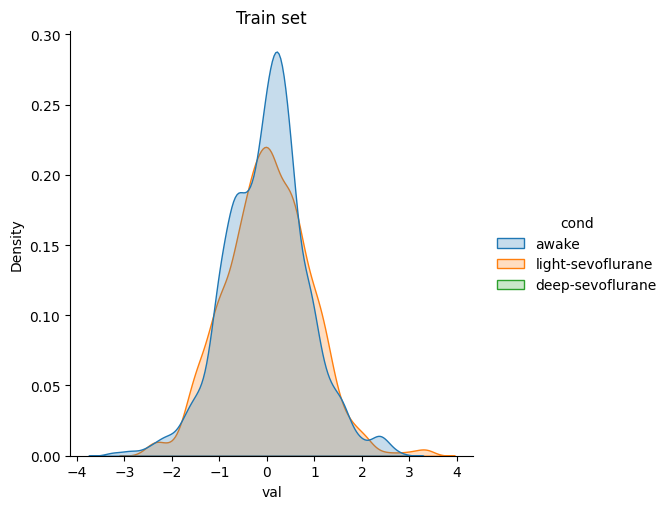

/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

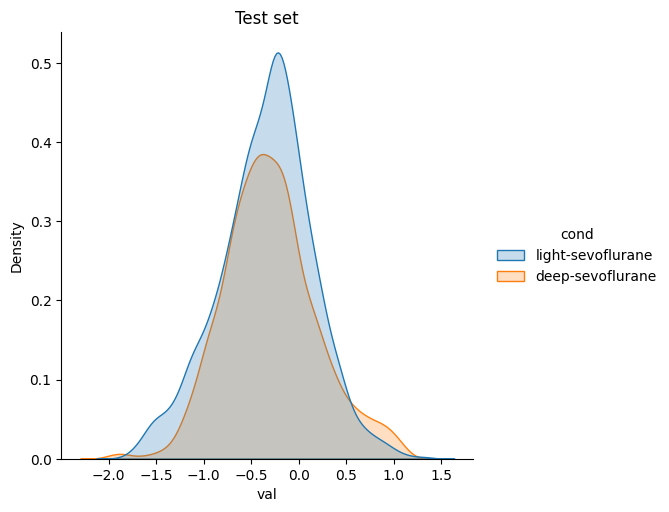

/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

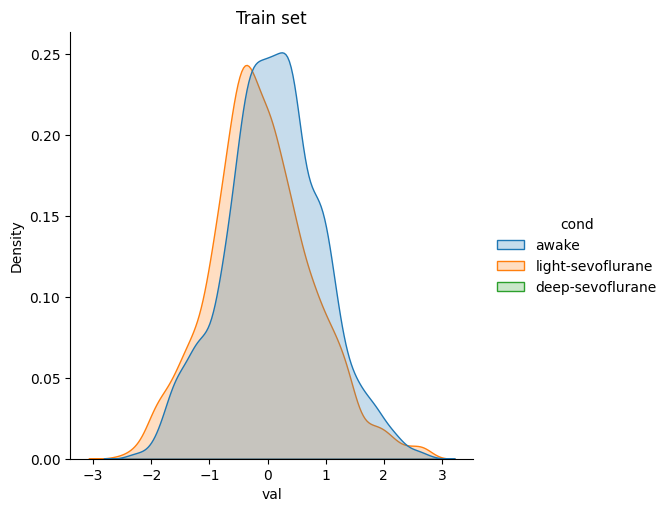

/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

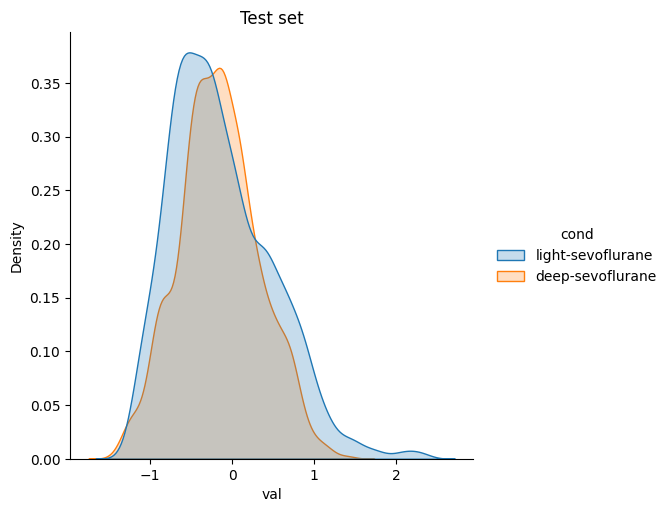

/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

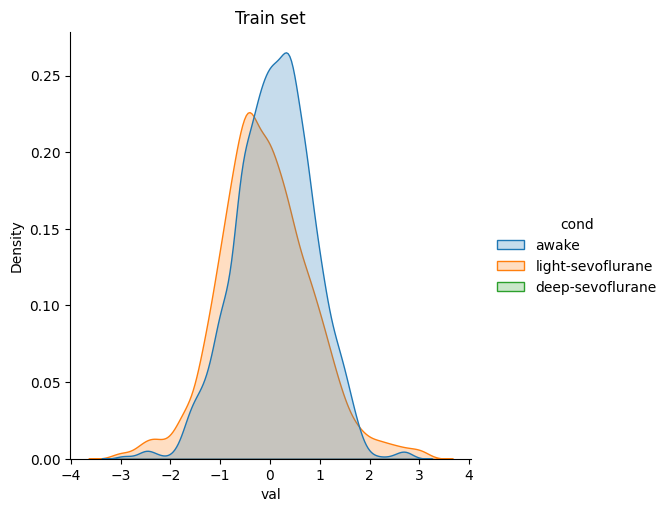

/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

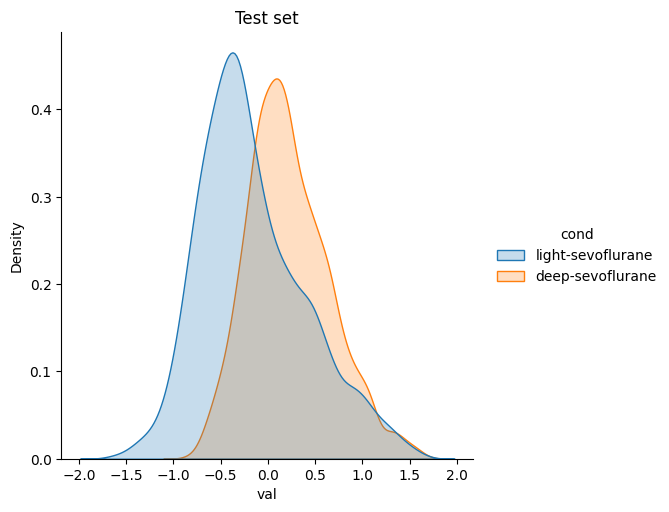

In [15]:
a = len(id_sessions_awake_train)
b = len(id_sessions_light_sevoflurane_train)
c = len(id_sessions_deep_sevoflurane_train)

for i in range(40,43):
    df_val = pd.DataFrame.from_dict({"val" : X_train_reduced[:,i].flatten()})
    df_cond = pd.DataFrame.from_dict({"condition" : y})

    db_train = pd.concat([df_val,df_cond],axis = 1)
    db_train.columns = ["val","cond"]

    compteur = 0
    bins = np.linspace(-10,10,100)

    fig = plt.figure(figsize=(15,10))

    sns.displot(data = db_train, x = "val", hue = "cond", kind="kde",  fill=True, color="g")

    plt.title("Train set")
    #plt.legend()

    plt.show()

    a = len(id_sessions_awake_test)
    b = len(id_sessions_light_sevoflurane_test)
    c = len(id_sessions_deep_sevoflurane_test)

    df_val = pd.DataFrame.from_dict({"val" : X_test_reduced[:,i].flatten()})
    df_cond = pd.DataFrame.from_dict({"condition" : y_test})

    db_test = pd.concat([df_val,df_cond],axis = 1)
    db_test.columns = ["val","cond"]

    compteur = 0
    bins = np.linspace(-10,10,100)

    fig = plt.figure(figsize=(15,10))

    sns.displot(data = db_test, x = "val", hue = "cond", kind="kde",  fill=True, color="g")

    plt.title("Test set")
    #plt.legend()

    plt.show()

/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

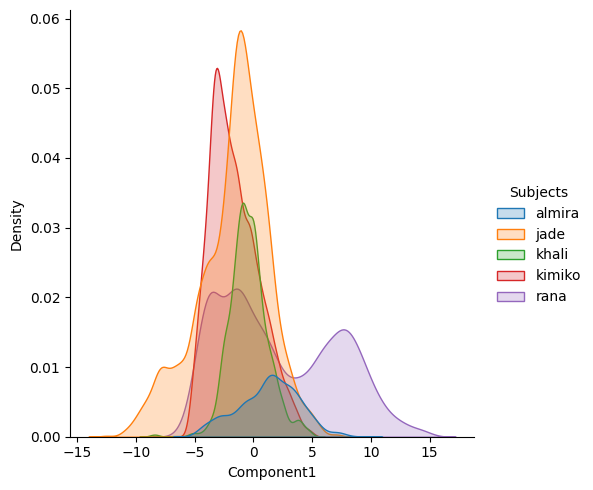

In [16]:
a = len(id_sessions_awake_train)
b = len(id_sessions_light_sevoflurane_train)
c = len(id_sessions_deep_sevoflurane_train)

df_val = pd.DataFrame.from_dict({"val" : X_all_reduced[:,0].flatten()})
df_cond = pd.DataFrame.from_dict({"condition" : y_all})

db_train = pd.concat([df_val,df_cond],axis = 1)
db_train.columns = ["Component1","Subjects"]

compteur = 0
bins = np.linspace(-10,10,100)

fig = plt.figure(figsize=(15,10))

for i in range(1):

    v_min = np.min(X_train_reduced[:,i])
    v_max = np.max(X_train_reduced[:,i])
    bins = np.linspace(v_min,v_max,100)

    sns.displot(data = db_train, x = "Component1", hue = "Subjects", kind="kde",  fill=True, color="g")
    
    #plt.legend()

plt.show()

Text(0.5, 1.0, 'component 3')

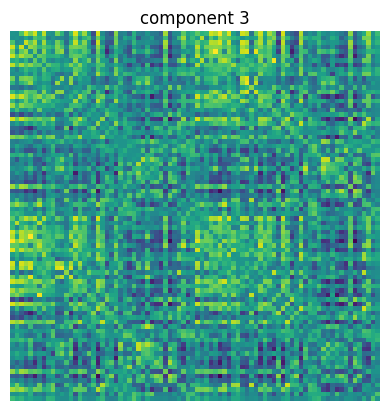

In [143]:
im = np.zeros((82,82))
iu = np.triu_indices(82,k=1)
il = np.tril_indices(82,k=-1)
im[iu[0],iu[1]] = v[:,0]
im = np.transpose(im)
im[iu[0],iu[1]] = v[:,0]
plt.imshow(im)
plt.axis("off")
plt.title(label="component {}".format(i))

In [191]:
y_test_num = np.array([0]*461*len(id_sessions_light_sevoflurane_test) + [1]*461*len(id_sessions_deep_sevoflurane_test))
val = np.linspace(np.min(X_test_reduced),np.max(X_test_reduced),300)
l_test = np.zeros((X_test_reduced.shape[1],2))
length = len(y_test_num)
fact0 = np.sum(y_test_num == 0)
fact1 = np.sum(y_test_num == 1)
for i in range(len(l_test)):
    accu = np.zeros((len(val)))
    accu2 = X_test_reduced[:,i].flatten()
    for k in range(len(val)):
        pred = (accu2 > val[k]).astype(int)
        accu[k] = np.sum((y_test_num == 0) * (pred == 0)) / (2*fact0) + np.sum((y_test_num == 1) * (pred == 1)) / (2*fact1)
    l_test[i] = [np.max(accu),np.argmax(accu)]

In [189]:
y_train_num = np.array([0]*461*len(id_sessions_light_sevoflurane_train) + [1]*461*len(id_sessions_deep_sevoflurane_train))
val = np.linspace(np.min(X_train_reduced),np.max(X_train_reduced),300)
l_train = np.zeros((X_train_reduced.shape[1],2))
length = len(y_train_num)
fact0 = np.sum(y_train_num == 0)
fact1 = np.sum(y_train_num == 1)
for i in range(len(l_train)):
    accu = np.zeros((len(val)))
    accu2 = X_train_reduced[:,i].flatten()
    for k in range(len(val)):
        pred = (accu2 > val[k]).astype(int)
        accu[k] = np.sum((y_train_num == 0) * (pred == 0)) / (2*fact0) + np.sum((y_train_num == 1) * (pred == 1)) / (2*fact1)
    l_train[i] = [np.max(accu),np.argmax(accu)]

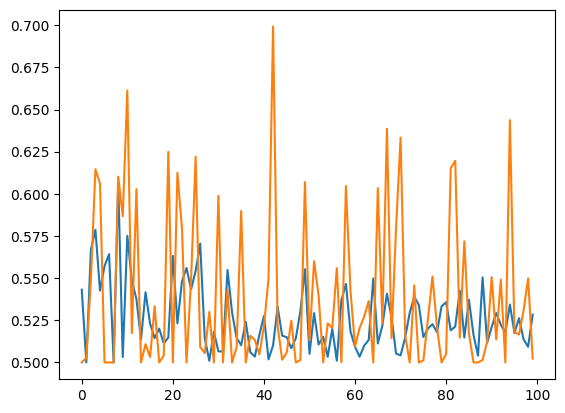

In [192]:
plt.plot(l_train[:,0])
plt.plot(l_test[:,0])

# PCA on single subject

In [4]:
id_sessions_almira = [i for i in range(len(meta)) if meta["monkey"].iloc[i] == "almira" and meta["condition"].iloc[i] in ["sevoflurane2","sevoflurane4"]]
id_sessions_jade = [i for i in range(len(meta)) if meta["monkey"].iloc[i] == "jade" and meta["condition"].iloc[i] in ["sevoflurane2","sevoflurane4"]]
id_sessions_khali = [i for i in range(len(meta)) if meta["monkey"].iloc[i] == "khali" and meta["condition"].iloc[i] in ["sevoflurane2","sevoflurane4"]]
id_sessions_kimiko = [i for i in range(len(meta)) if meta["monkey"].iloc[i] == "kimiko" and meta["condition"].iloc[i] in ["sevoflurane2","sevoflurane4"]]
id_sessions_rana = [i for i in range(len(meta)) if meta["monkey"].iloc[i] == "rana" and meta["condition"].iloc[i] in ["sevoflurane2","sevoflurane4"]]

### Almira

In [ ]:
X_kimiko = dfc_flat[id_sessions_almira,:,:].reshape(-1,3321)
y_kimiko = np.concatenate([np.array([meta["condition"].iloc[i]]*461) for i in range(len(meta)) if meta["monkey"].iloc[i] == "kimiko" and meta["condition"].iloc[i] in ["sevoflurane2","sevoflurane4"]])

In [13]:
y_kimiko

array([['sevoflurane2', 'sevoflurane2', 'sevoflurane2', ...,
        'sevoflurane2', 'sevoflurane2', 'sevoflurane2'],
       ['sevoflurane2', 'sevoflurane2', 'sevoflurane2', ...,
        'sevoflurane2', 'sevoflurane2', 'sevoflurane2'],
       ['sevoflurane2', 'sevoflurane2', 'sevoflurane2', ...,
        'sevoflurane2', 'sevoflurane2', 'sevoflurane2'],
       ...,
       ['sevoflurane4', 'sevoflurane4', 'sevoflurane4', ...,
        'sevoflurane4', 'sevoflurane4', 'sevoflurane4'],
       ['sevoflurane4', 'sevoflurane4', 'sevoflurane4', ...,
        'sevoflurane4', 'sevoflurane4', 'sevoflurane4'],
       ['sevoflurane4', 'sevoflurane4', 'sevoflurane4', ...,
        'sevoflurane4', 'sevoflurane4', 'sevoflurane4']], dtype='<U12')